# Tutorial 1: getting started with a 3D Laplace 

Let us consider the following weak formulation

$$\int_{\Omega} N_i N_j + \nabla N_i \cdot \nabla N_j ~d\Omega$$

In the case where $\Omega$ is the unit cube, we should expect the GLT symbol

$$
\mathfrak{m}_p(\theta_1) \mathfrak{m}_p(\theta_2) \mathfrak{m}_p(\theta_3) + \mathfrak{m}_p(\theta_1) \mathfrak{m}_p(\theta_2) \mathfrak{s}_p(\theta_3) + \mathfrak{m}_p(\theta_1) \mathfrak{s}_p(\theta_2) \mathfrak{m}_p(\theta_3) + \mathfrak{s}_p(\theta_1) \mathfrak{m}_p(\theta_2) \mathfrak{m}_p(\theta_3)
$$


In [1]:
# ... some imports
from sympy.core.containers import Tuple
from sympy import symbols
from sympy import Symbol
from sympy import Lambda
from sympy import IndexedBase

from gelato.glt import glt_symbol
from gelato.calculus   import (Dot, Cross, Grad, Curl, Rot, Div)
from gelato.calculus   import Constant

# TODO to be removed later
DIM = 3
# ...

In [2]:
x,y,z = symbols('x y z')

u = Symbol('u')
v = Symbol('v')

a = Lambda((x,y,z,v,u), Dot(Grad(u), Grad(v)))
print '> input       := {0}'.format(a)

# ... create a glt symbol from a string without evaluation
#     a discretization is defined as a dictionary
discretization = {"n_elements": [16, 16, 16], "degrees": [3, 3, 3]}

expr = glt_symbol(a, dim=DIM, discretization=discretization, evaluate=False)
print '> glt symbol  := {0}'.format(expr)


> input       := Lambda((x, y, z, v, u), Dot(Grad(u), Grad(v)))
> glt symbol  := m1*m2*s3 + m1*m3*s2 + m2*m3*s1


We get a *sympy* expression, that we can manipulate like any other *sympy*
expression. Let's print it

In [3]:
print expr

m1*m2*s3 + m1*m3*s2 + m2*m3*s1


Good, but that's not readable for a human. You can now convert this expression to latex using


In [4]:
from IPython.display import Math;
from sympy import latex;

In [5]:
Math(latex(expr))

<IPython.core.display.Math object>

For pretty printing, you may need the **glt_latex** function

In [6]:
from gelato.printing.latex import glt_latex;
Math(glt_latex(expr))

<IPython.core.display.Math object>

Let's now **evaluate** our symbol (in the symbolic sens) in order to do some diagnostics

In [7]:
expr = glt_symbol(a, dim=DIM, discretization=discretization, evaluate=True)

We recall that the eigenvalues of the matrix associated to our weak formulation can be *approximated* by a *uniform sampling* of the symbol

In [8]:
from gelato.glt import glt_approximate_eigenvalues
eig = glt_approximate_eigenvalues(expr, discretization)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

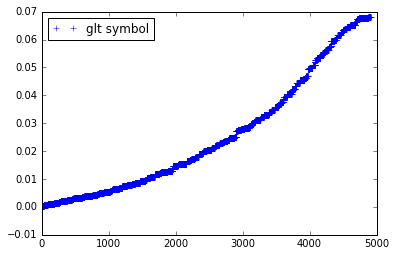

In [10]:
t = eig
t.sort()
plt.plot(t, "+b", label="glt symbol")
plt.legend(loc=2);

We will see later, another way of plotting these eigenvalues.
Another interesting feature of our symbol, is **numerical evaluation**. For this, you need to call the **glt_lambdify** function

In [11]:
from gelato.glt import glt_lambdify

f = glt_lambdify(expr)

Now $f$ is a function that you can evaluate numerically.

In [12]:
from numpy import pi
f(0.1,0.1,0.1,pi, pi, pi)

0.00029125724364162235